In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'C:\Users\SREELAKSHMI\Downloads\train_ctrUa4K.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Handling Null values

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

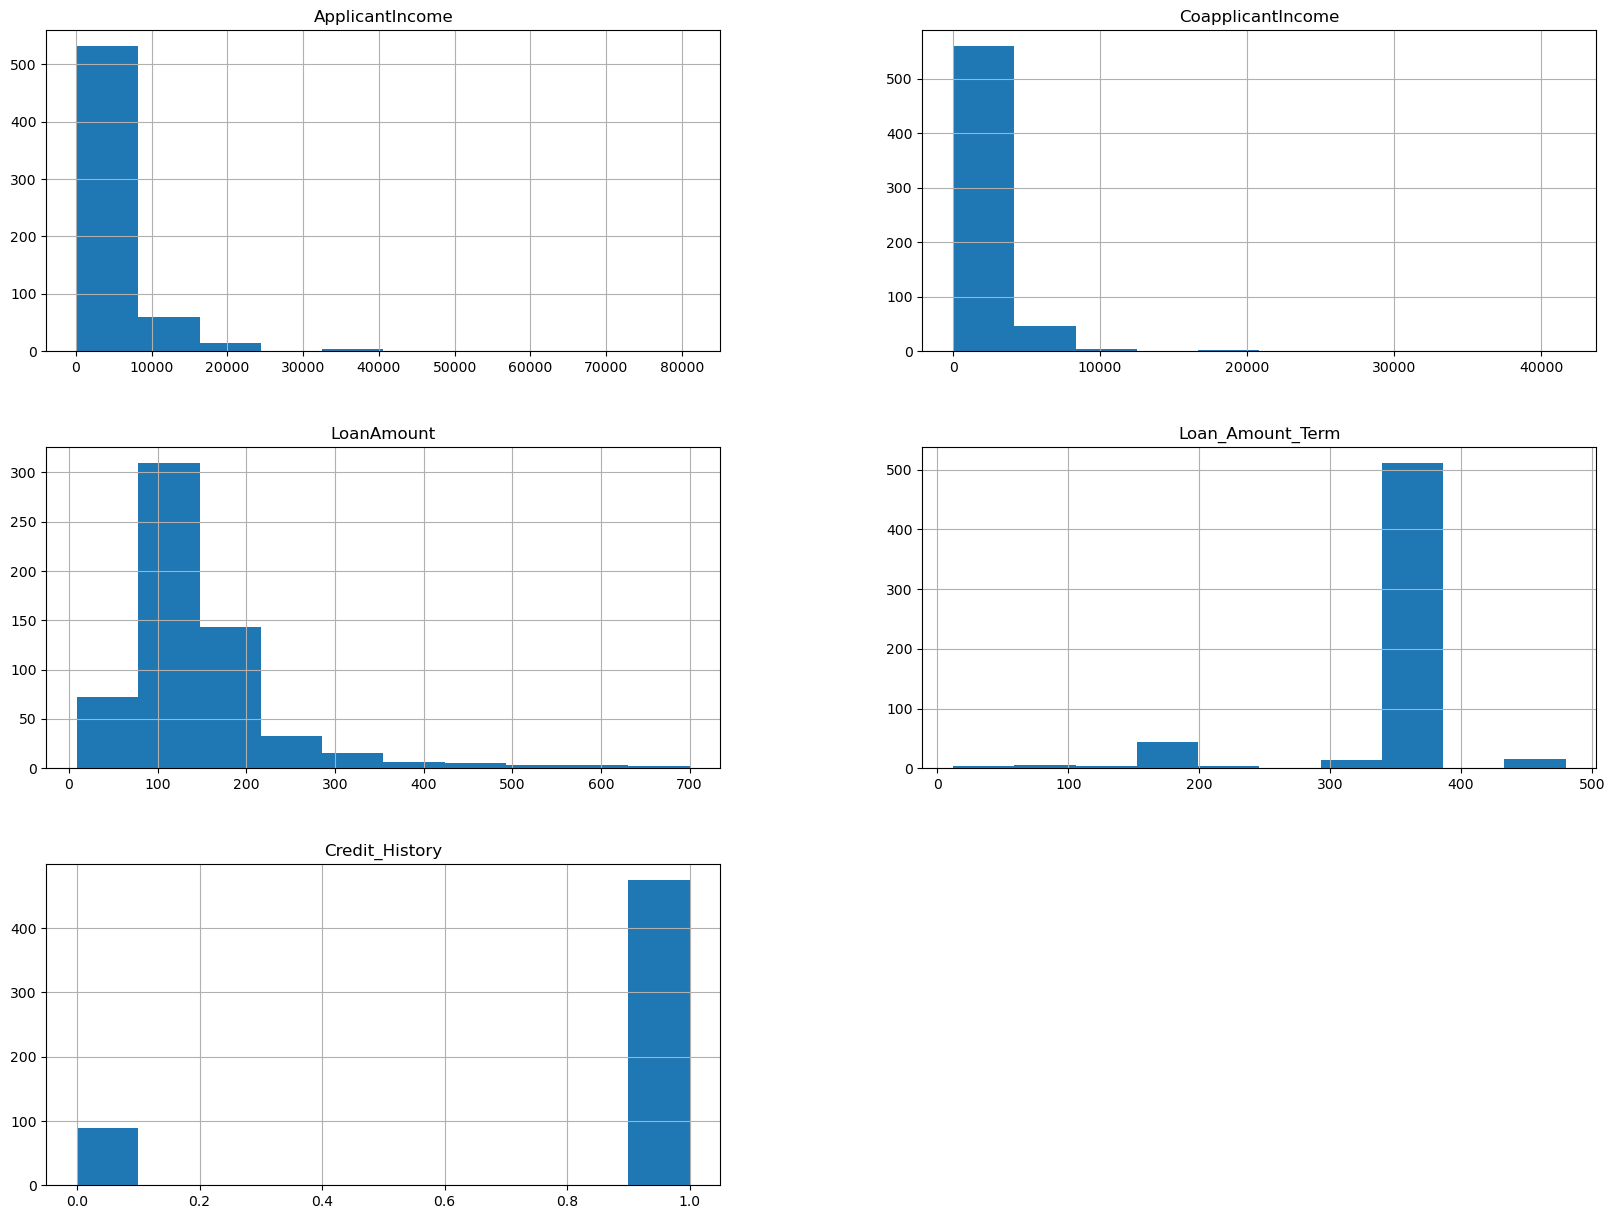

In [7]:
data.hist(figsize=(20,15))
plt.show()

In [29]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [30]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [23]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [24]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [25]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [31]:
data.isnull().sum()



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling outliers


In [33]:
data.columns



Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

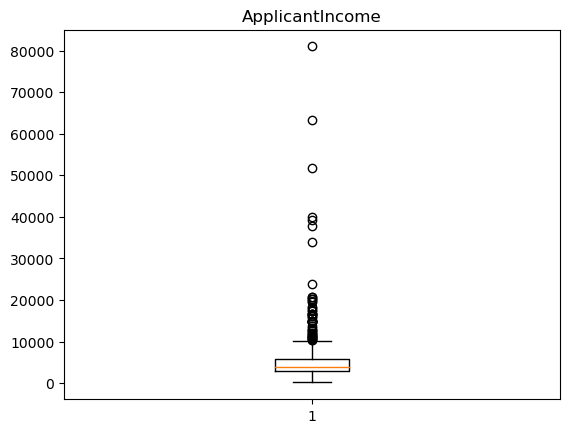

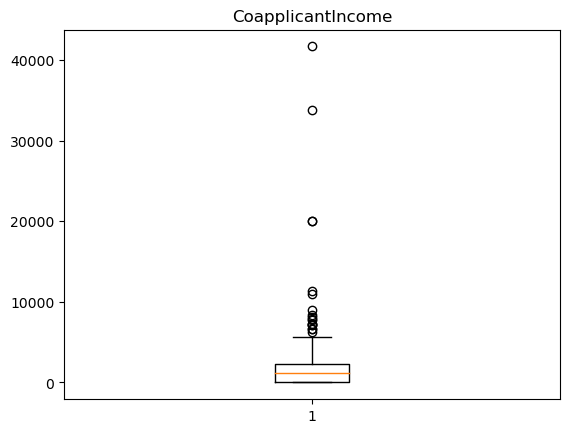

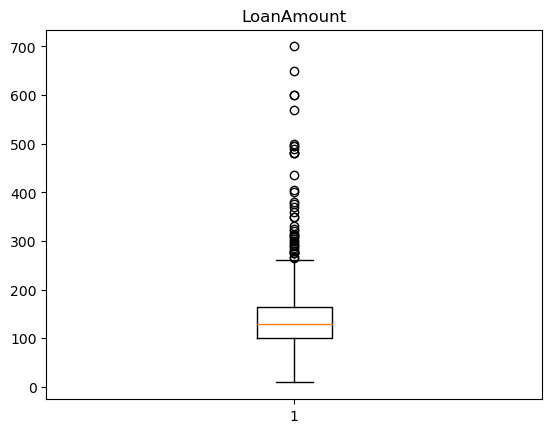

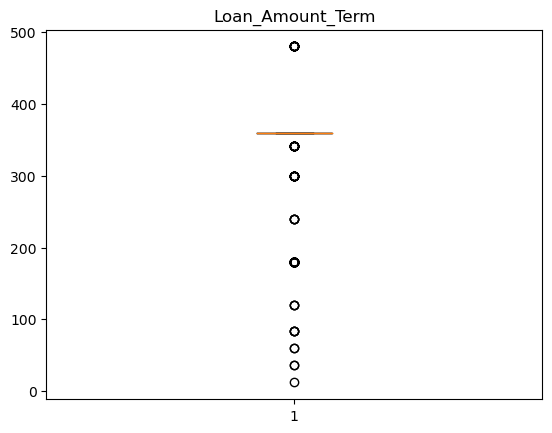

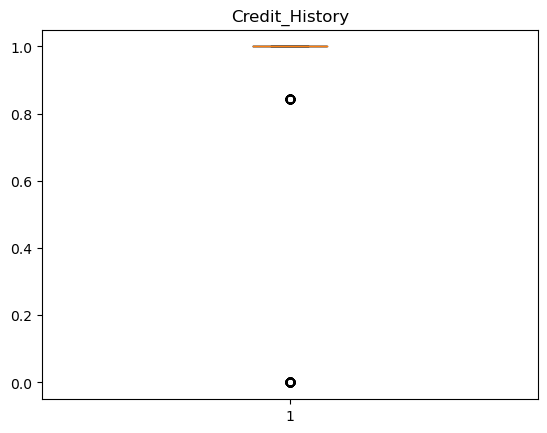

In [36]:
num_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [37]:
Q1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
Q3=np.percentile(data['ApplicantIncome'],75,interpolation='midpoint')

C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_1636\3890054736.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_1636\3890054736.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_1636\3890054736.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the

In [38]:
IQR=Q3-Q1
print(IQR)

2911.0


In [40]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
print(up_lim)
print(low_lim)

10156.5
-1487.5


In [44]:
data['ApplicantIncome']=np.where(data['ApplicantIncome']>up_lim,up_lim,np.where(data['ApplicantIncome']<low_lim,low_lim,data['ApplicantIncome']))

In [45]:
num_cols=[ 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
for i in num_cols:
    Q1=np.percentile(data[i],25,interpolation='midpoint')
    Q2=np.percentile(data[i],50,interpolation='midpoint')
    Q3=np.percentile(data[i],75,interpolation='midpoint')
    IQR=Q3-Q1
    up_lim=Q3+1.5*IQR
    low_lim=Q1-1.5*IQR
    data[i]=np.where(data[i]>up_lim,up_lim,np.where(data[i]<low_lim,low_lim,data[i]))

C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_1636\1838783320.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data[i],25,interpolation='midpoint')
C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_1636\1838783320.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data[i],50,interpolation='midpoint')
C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_1636\1838783320.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'high

# Encoding


In [61]:
data=data.drop('Loan_ID',axis=1)

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [64]:
le=LabelEncoder()
cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']
for i in cols:
 data[i]=le.fit_transform(data[i])


In [65]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


# Modelling

In [68]:
# test - 30%
from sklearn.model_selection import train_test_split
# input data
X = data.drop(columns=['Loan_Status'])
# output data
Y = data['Loan_Status']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42)

In [77]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model =lr.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [75]:
from sklearn.metrics import mean_squared_error,r2_score


In [76]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.16538525935891057
0.2743191664668314


In [79]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_log=logit_model.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [85]:
print('Accuracy=',accuracy_score(y_test,y_pred_log))
print('Precision=',precision_score(y_test,y_pred_log))
print('Recall=',recall_score(y_test,y_pred_log))
print('f1_score=',f1_score(y_test,y_pred_log))

Accuracy= 0.7891891891891892
Precision= 0.7612903225806451
Recall= 0.9833333333333333
f1_score= 0.8581818181818182


In [91]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model_knn.score(x_test, y_test) )
y_pred_knn=model_knn.predict(x_test)

Accuracy:  0.5783783783783784


In [92]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred_knn))
print('Precision=',precision_score(y_test,y_pred_knn))
print('Recall=',recall_score(y_test,y_pred_knn))
print('f1_score=',f1_score(y_test,y_pred_knn))

Accuracy= 0.5783783783783784
Precision= 0.6418918918918919
Recall= 0.7916666666666666
f1_score= 0.708955223880597


In [93]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) )

Accuracy:  0.6378378378378379
